In [22]:
%pylab inline

import spot
import PatternStimulus as ps
import pickle
import sequence
reload(sequence)
import random
from time_shifter import duration_shifter

Populating the interactive namespace from numpy and matplotlib


/Users/Edmund/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
with open('9495.pickle','rb') as fn:
    sess, spots = pickle.load(fn)

In [24]:
ptn='A10_B50_C90_D130_E170_F210'


In [25]:
#ptn='R10_R50_R90_R130_R170_R210'
#ptn='A10_B50_C90_D130_E170_F210'

sess[-1]['patterns'][ptn]

{'defn': {'A': {'dur': 80, 'intensity': 255, 'onset': 10},
  'B': {'dur': 80, 'intensity': 255, 'onset': 50},
  'C': {'dur': 80, 'intensity': 255, 'onset': 90},
  'D': {'dur': 80, 'intensity': 255, 'onset': 130},
  'E': {'dur': 80, 'intensity': 255, 'onset': 170},
  'F': {'dur': 80, 'intensity': 255, 'onset': 210}}}

In [26]:
nowSess=sess[-1]
xy,timing,intensities,grouptimes,rand_args=ps.get_pattern_params(spots['list'],ptn,nowSess) 

In [27]:
rand_args['randt']=3
timing=[[10,90],[20,100],[30,110],[40,120],[50,130],[60,140]]
timing

[[10, 90], [20, 100], [30, 110], [40, 120], [50, 130], [60, 140]]

In [46]:
fixed_spotsize=120
spotsizes=[fixed_spotsize for x in range(len(xy))] #TODO: variable spot size per spot
isProbe = 1
rig='Polygon'
seq_obj=sequence.Sequence(spots=xy,
                          timing=timing,
                          isProbe=isProbe,
                          rig=rig,
                          spotsizes=spotsizes,
                          label=ptn,
                          mode='grid',
                          intensities=intensities,
                          grouptimes=grouptimes,
                          rand_args=rand_args)


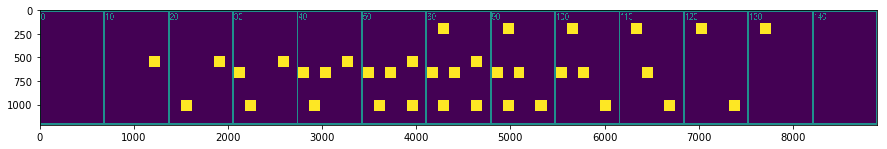

In [47]:
plt.figure(figsize=(15,15))
seq_obj.show()

[  0   0   0   0 -20 -20]
(10, 90) [10, 90]
(20, 100) [20, 100]
(30, 110) [30, 110]
(40, 120) [40, 120]
(50, 130) [30, 110]
(60, 140) [40, 120]


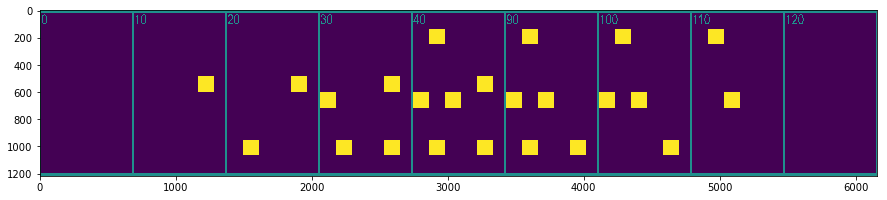

In [48]:
seq_obj.randomize()
plt.figure(figsize=(15,15))
seq_obj.show()


In [ ]:
seq_obj.randomize()
for s in seq_obj.spotlist:
    print tuple(s.xy) in spots['list']['R']
    

In [ ]:
results={}
for i in range(10000):
    old_target = [(10, 90), (50, 130),(90, 170), (130, 210), (170, 250), (210, 290)]
    oldt=list(random.choice(old_target))
    pos=random.choice([0,1])
    shift=random.choice([-40,40])
    newt=oldt[:]
    newt[pos]=max(0,oldt[pos]+shift)
    if tuple(oldt) in results:
        results[tuple(oldt)].append(newt)
    else:
        results[tuple(oldt)] = [newt]


In [ ]:
s=(50,130)
spot_result=np.array(results[s])
fig,ax=plt.subplots(1,1)
a=np.mean(spot_result,axis=0)[0]
b=np.mean(spot_result,axis=0)[1]
a_err = np.std(spot_result,axis=0)[0]
b_err = np.std(spot_result,axis=0)[1]
y_pos = 1500
y_height = 100

ax.barh(y_pos,left=a,width=b-a,height = y_height,align='center',
        color='green', zorder=99)

ax.errorbar(a,y_pos,xerr=a_err,color='k')
ax.errorbar(b,y_pos,xerr=b_err,color='k')
ax.set_ylim(50,2000)
ax.set_xlim(0,200)

ax.hist(spot_result[:,1], color='orange',bins = binBoundaries);
ax.hist(spot_result[:,0], color='blue', bins = binBoundaries,alpha=0.7);

In [ ]:
old_target = [(10, 90), (50, 130),(90, 170), (130, 210), (170, 250), (210, 290)]
shift_map={}
for t in old_target:
    shift_map[t]=t

old_t=random.choice(shift_map.keys())
shift_list=[-40,-60,+40,+60]
shift=random.choice(shift_list)
new_t=(old_t[0],old_t[1]+shift)
print old_t,new_t
shift_map[old_t]=new_t

In [ ]:
shifter=duration_shifter(1)
shifter.get_shift_map()

In [ ]:
shifter.get_shift_map()